# PCA intro

**Curse of dimensionality** 👉 ML problems that involve thousands or millions of features for each training instance, making training slow and hard to find good solutions.

- However reducing dimensionality does cause some information loss, so it will speed up training but may make the system perform worse.

Main motivations for dimensionality reduction:

- Speed up a subsequent training alogrithm (in some cases it might remove noise & redundant features, not always tho)
- Visualize the data and gain insights on the most important features
- Save space (compression of images for instance)
    

Main drawbacks:

- Some information is lost, possibly degrading the perfomance of subsequent training algorithms
- It can be computationally intensive
- Adds some complexity to your ML pipelines
- Transformed features are often hard to interpret

## Approaches for Dimensionality Reduction

### Projection

✅ 3D plane to be projected on a 2D plane

<div>
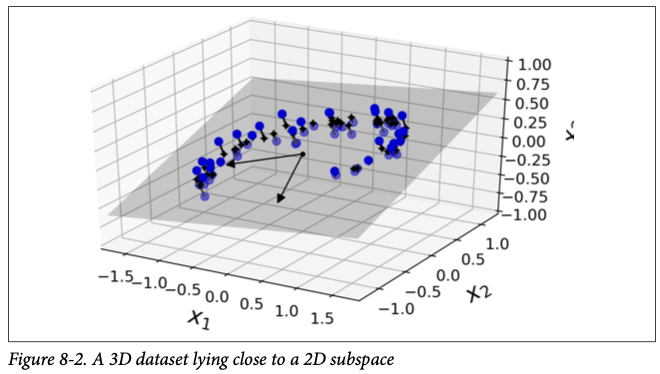
</div>

<div>
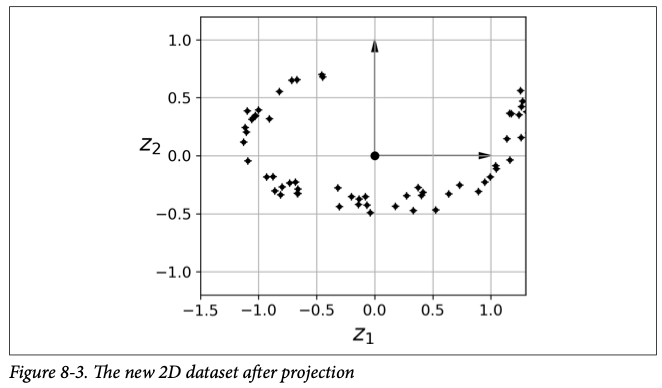
</div>

⛔️ 3D plane to be projected on a 2D plane - That doesn't work as straight forward


- 🔥 In the case of the Swiss roll, there are no useless dimensions, then reducing dimensionality with PCA will loose too much information:
    - You dont want to squash it (left image),
    - You want to unroll it (right image).

<div>
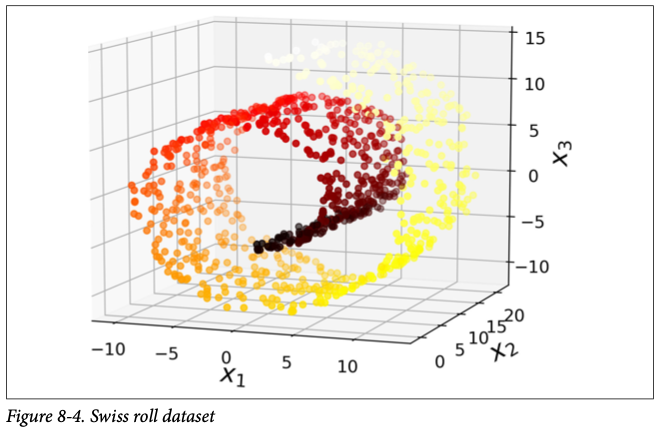
</div>

<div>
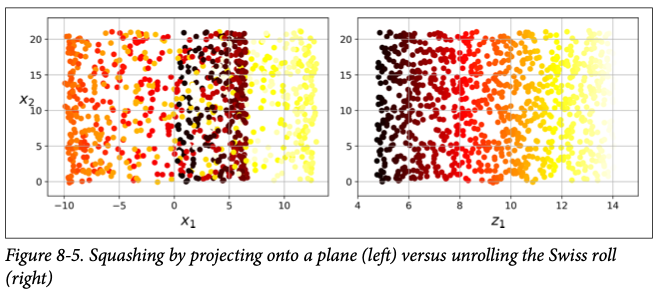
</div>

### Manifold

Swiss roll on the right is a 2D manifold. It means that the 2D can be bent and twisted in a higher-dimensional space.

Depending on the dataset, the manifold reduction can:

- simplify (upper half) 
- or not (lower half) 

the understanding of the dataset

<div>
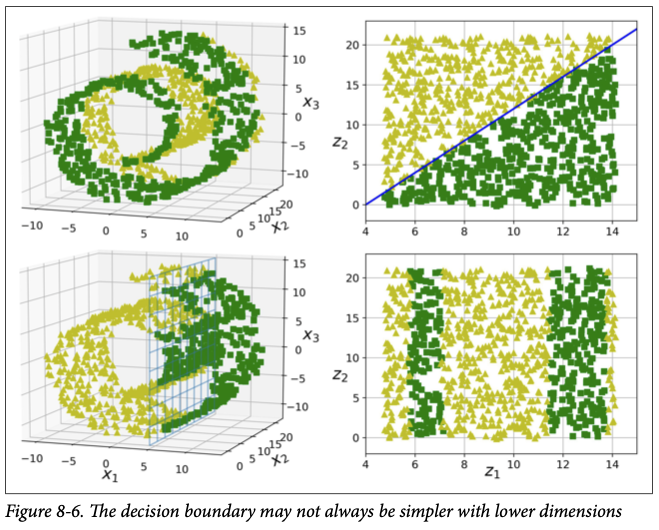
</div>

## Dimensionality Reduction Techniques

### PCA

Principal Component Analysis is by far the most popular dimensionality reduction technique. It first identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

<div>
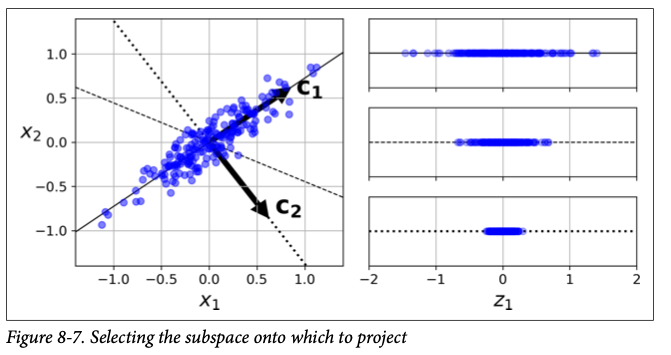
</div>

The 2D dataset above is projected on different axes. How to choose with ax to use?
1. Top (solid line) - Preserves maximum variance
2. Middle (dashed) - Intermediate amount of variance
3. Lower (dotted) - Very little variance

The **top** one should be selected:
- It preserves the max amount of variance, as it will lose less information than the other projections.
- It minimises the mean squared distance between the original dataset and its projection onto that axis. 🔥 (which is the main idea of PCA)

#### How PCA Works ?

🔥 PCA requires the dataset to be centered around the origin! (sklearn PCA does it for you)

1. C1 -> **PCA identifies the axis that accounts for the largest amount of variance in the training set**
2. C2 -> The it finds a second axis - orthogonal - to the first one, that accounts for the largest amount of remaining variance.
3. PCA will find as many axis, as number of dimensions in the dataset.
4. Reduce the dimension of the dataset down to **d** dimensions trying to preserve as much variance as possible.

In [1]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

#### Explained Variance Ratio

The ration indicates the proportion of the dataset's variance that lies along each principal component. 

#### Choosing the right number of dimensions

It is not arbitrarily how we choose the number of dimensions to reduce down to. We choose the number of dimensions that add up to a sufficiently large portion of the variace (>90%).

In [ ]:
# code to get the number of dimensions that explain 95 of the variance
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
# you could also just pass the variance you want
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

#### Elbow Curve

Plotting to see the cumulative sum of explained variance

<div>
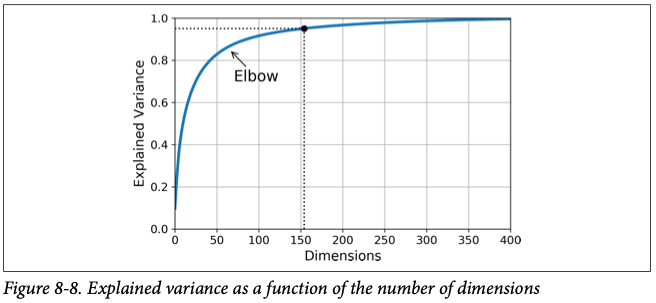
</div>

### Kernel PCA

🔥 Useful for non-linear datasets

The same Kernel trick for SVMs can be applied here (reduce the dimension into complex nonlinear projections).

- Linear Kernel - Equivalent to use regular PCA
- RBF 
- Sigmoid


In [2]:
from sklearn.decomposition import KernelPCA

In [ ]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.4)
X_reduced = rbf_pca.fit_transform(X)

<div>
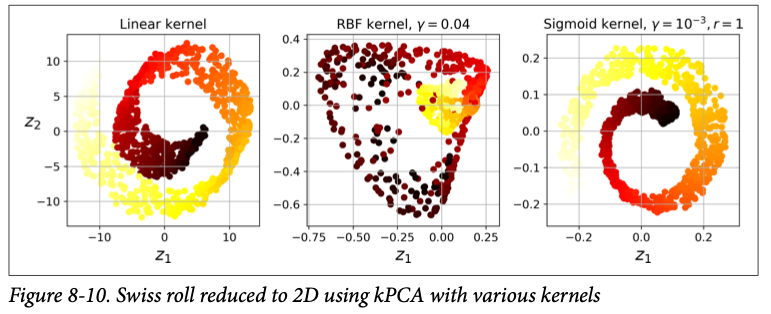
</div>

🔥 kPCA is an **unsupervised** learning algorithm, so there is no obvious performance measure to select the best kernel and hyperparameters values. 

However dimensionality reduction is a preparation step for supervised learning (eg classification), so GridSearch can be used to select the kernel & hyperparameters that lead to the best performance of the task.

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
clf = Pipeline([
            ("kpca", KernelPCA(n_components=2)),
            ("log_reg", LogisticRegression())
            ])

param_grid = [{
            "kpca__gamma": np.linspace(0.03, 0.05, 10),
            "kpca__kernel": ["rbf", "sigmoid"]
            }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

### Locally Linear Embedding LLE

It is a Manifold Learning technique that **does not rely on projections** like the previous algorithms. 

In a nutshell, LLE works by:
- first measuring how each training instance linearly relates to its closest neighbors (c.n.), 
- and then looking for a low-dimensional representation of the training set where these local relationships are best preserved. 

This makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise.

In [4]:
from sklearn.manifold import LocallyLinearEmbedding

In [ ]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

<div>
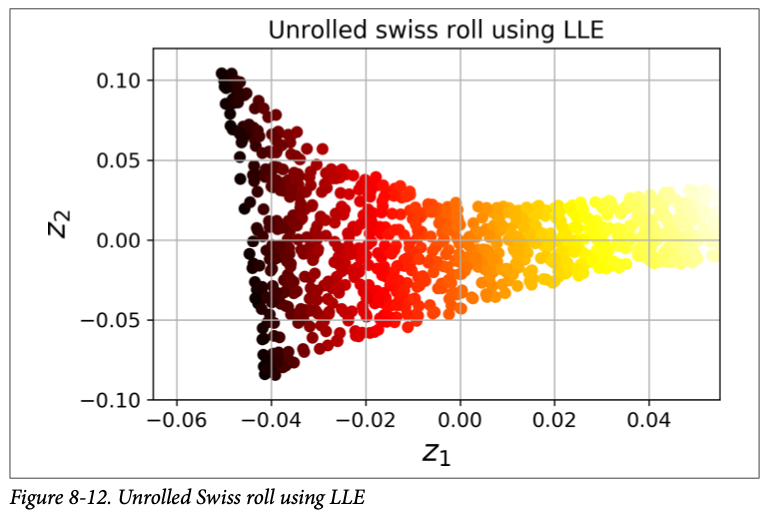
</div>

## Using different types of PCA

- Regular PCA - only works if the dataset fits in memory

- Incremental PCA - Useful for large datasets that dont fit in memory, slower than PCA. It is also useful for online learning

- Randomised PCA - useful when you want to considerably reduce dimensionality and the data set fits in memory, faster than regular PCA

- Kernel PCA - Useful for nonlinear datasets